<a href="https://colab.research.google.com/github/Amritpal-nitj/SCT_ML_2/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING DATA USING PANDAS**

In [1]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
display(df.head())
display(df.info())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Step 1: Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# Step 2: Feature scaling (important for distance-based algorithms like K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Step 3: Use the Elbow method to find optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

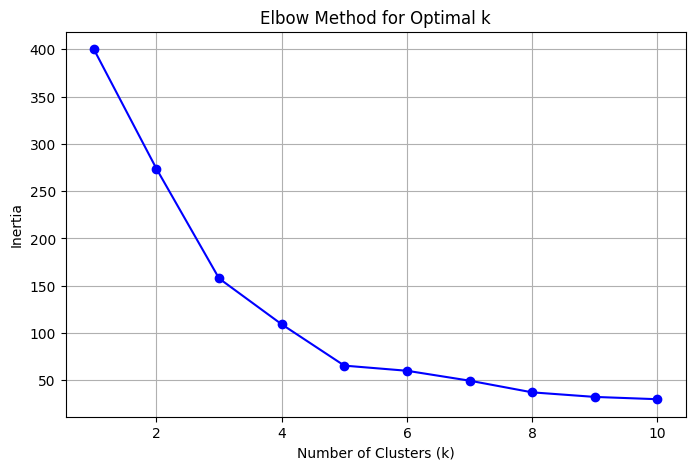

In [7]:
# Step 4: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [8]:
# Step 5: Fit KMeans with optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [9]:
# Step 6: Add cluster labels to the dataframe
df['Cluster'] = clusters

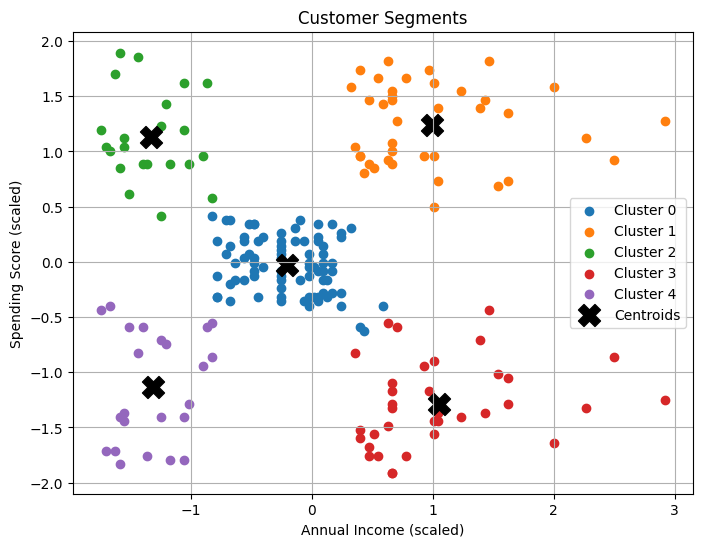

In [10]:
# Step 7: Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(X_scaled[clusters == cluster, 0], X_scaled[clusters == cluster, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, c='black', marker='X', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments')
plt.legend()
plt.grid(True)
plt.show()